In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('height-weight.csv')

In [24]:
df = pd.DataFrame(data)

In [25]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [26]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [27]:
df.size

46

In [28]:
df.shape

(23, 2)

In [29]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [31]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

In [32]:
df.dropna()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [33]:
df.drop_duplicates()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [34]:
df.shape


(23, 2)

In [35]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool

Text(0, 0.5, 'Height')

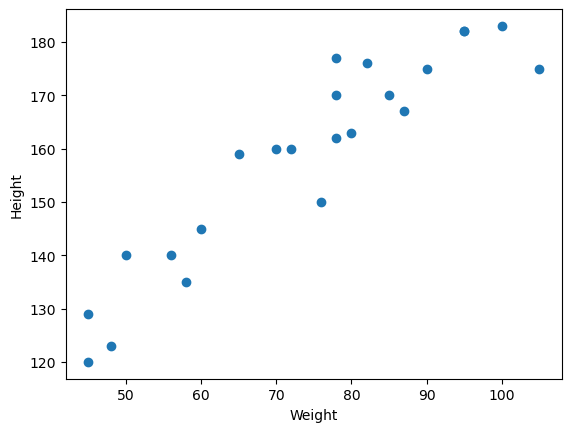

In [36]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [37]:
x = df[['Weight']] 
y = df['Height']

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit_transform(X_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

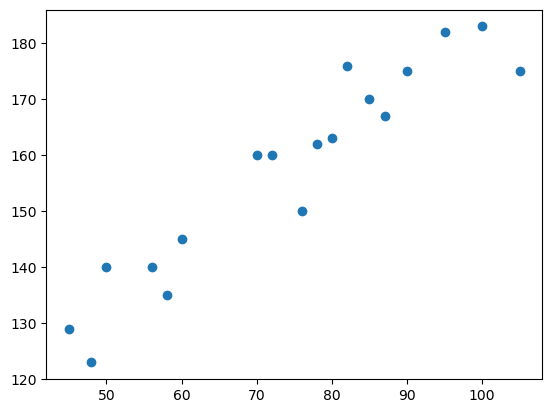

In [46]:
plt.scatter(X_train,Y_train)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
regressor = LinearRegression()

In [49]:
train = regressor.fit(X_train,Y_train)

In [50]:
train

LinearRegression()

In [53]:
regressor.intercept_

85.96709053063559

In [54]:
regressor.coef_

array([0.9630459])

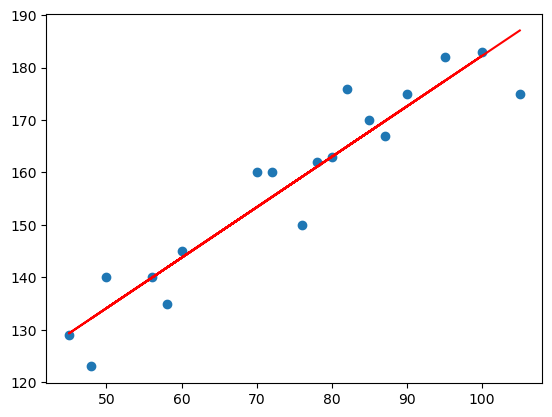

In [55]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [60]:
y_pred_test = regressor.predict(X_test)

C:\Users\91932\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
y_pred_test

array([86.16975108, 86.16975108, 84.37302922, 87.09533506, 85.46195156])

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [64]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6192.3331592623745
75.74603640116501
78.69137919278309


In [66]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred_test)
score

-11.579906466890895

In [68]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-15.773208622521192